In [1]:
import time as clock
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define amount of sample points
N = 2000

In [3]:
def thermal_conductivity_equation(t, x):
    return (2 + torch.exp(-4*(torch.pi**2)*t)*torch.sin(2*torch.pi*x) + torch.exp(-16*(torch.pi**2)*t)*torch.cos(4*torch.pi*x))

# function depicting a real graph and a predicted one
def check_current_situation(cur_model):
    x = torch.linspace(0, 1, 100)
    time = torch.zeros(100)
    real_temp = thermal_conductivity_equation(time, x)

    test_points = torch.stack((x, time), axis = -1)

    pinn_temp = cur_model(test_points)

    plt.plot(x.detach(), pinn_temp.detach())
    plt.plot(x, real_temp)

    plt.plot()
    plt.show()

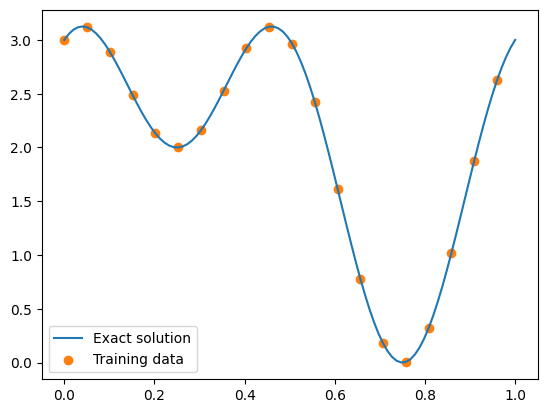

In [4]:
x = torch.linspace(0, 1, 100)
time = torch.zeros(100)
temp = thermal_conductivity_equation(time, x)

x_data = x[0:100:5]
temp_data = temp[0:100:5]


plt.plot(x, temp, label="Exact solution")
plt.scatter(x_data, temp_data, color="tab:orange", label="Training data")

plt.legend()
plt.show()

In [5]:
#define the class PINN
class PINN(nn.Module):
    def __init__(self, input_layer = 2, hidden_layer = 32, number_layers = 3, output_layer = 1):
        super().__init__()
        
        activation = nn.Tanh
        
        self.fcs = nn.Sequential(*
            [
                nn.Linear(input_layer, hidden_layer),
                activation()
            ]
        )
        
        self.fch = nn.Sequential(*
            [
                nn.Sequential(*
                    [
                        nn.Linear(hidden_layer, hidden_layer),
                        activation()
                    ]
                ) for _ in range(number_layers - 1)
            ]
        )
        
        self.fce = nn.Linear(hidden_layer, output_layer)
        
        
    def forward(self, x):
        x = F.gelu(self.fcs(x))
        x = F.gelu(self.fch(x))
        x = F.gelu(self.fce(x))
        
        return x

In [14]:
x_physics = torch.rand(N).view(-1, 1).requires_grad_(True)
time_physics = 0.05 * torch.rand(N).view(-1, 1).requires_grad_(True)

points_for_pinn_model = torch.stack((time_physics, x_physics), -1)
boundary_condition_points = torch.stack((torch.zeros(N), x_physics[:,0]), -1).unsqueeze(0)


In [40]:
torch.manual_seed(123)

pinn_model = PINN()
# optimizer = torch.optim.SGD(pinn_model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(pinn_model.parameters(), lr = 0.01)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5000, gamma=0.5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor = 0.7)

epoch: 0, loss: 9.502099990844727, learning_rate: 0.01


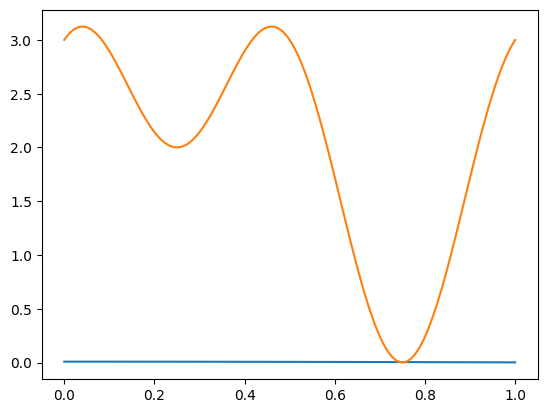

epoch: 250, loss: 1.2035260200500488, learning_rate: 0.01
epoch: 500, loss: 1.2031748294830322, learning_rate: 0.01
epoch: 750, loss: 1.1935738325119019, learning_rate: 0.01
epoch: 1000, loss: 1.1580449342727661, learning_rate: 0.01


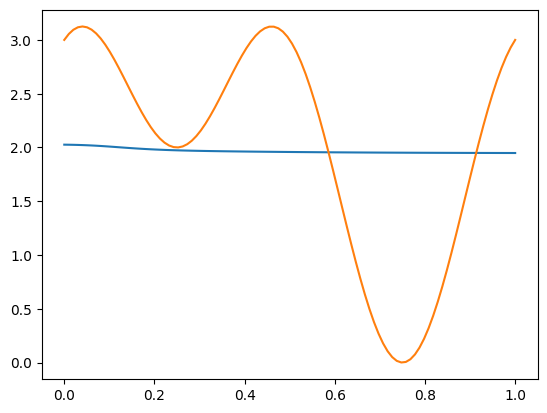

epoch: 1250, loss: 1.1912384033203125, learning_rate: 0.01
epoch: 1500, loss: 0.8576526045799255, learning_rate: 0.01
epoch: 1750, loss: 0.8205679059028625, learning_rate: 0.01
epoch: 2000, loss: 0.8197267055511475, learning_rate: 0.01


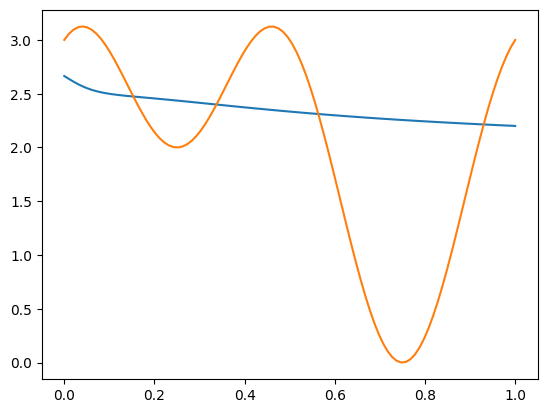

epoch: 2250, loss: 0.8165756464004517, learning_rate: 0.01
epoch: 2500, loss: 0.8149943351745605, learning_rate: 0.01
epoch: 2750, loss: 0.8047065734863281, learning_rate: 0.01
epoch: 3000, loss: 0.7736775875091553, learning_rate: 0.01


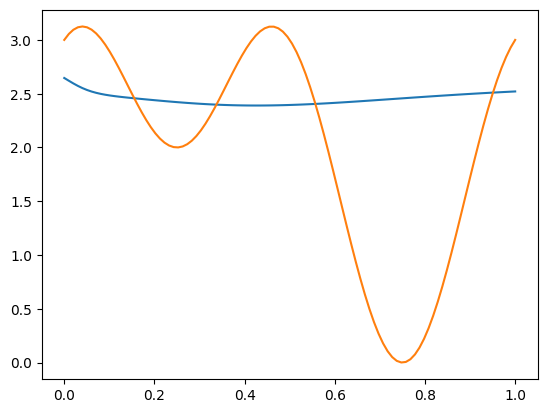

epoch: 3250, loss: 0.7608643770217896, learning_rate: 0.01
epoch: 3500, loss: 0.7226359844207764, learning_rate: 0.01
epoch: 3750, loss: 0.7203792929649353, learning_rate: 0.01
epoch: 4000, loss: 0.7028348445892334, learning_rate: 0.01


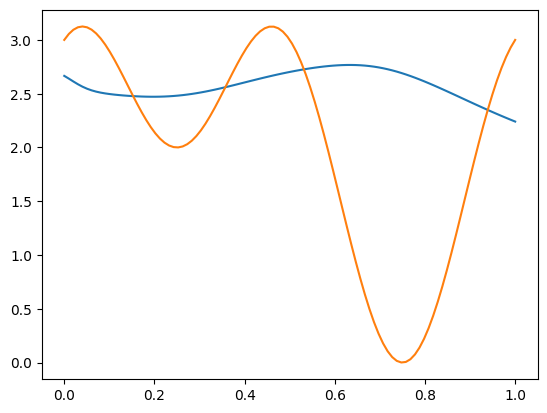

epoch: 4250, loss: 0.6829144954681396, learning_rate: 0.01
epoch: 4500, loss: 0.7025063633918762, learning_rate: 0.01
epoch: 4750, loss: 0.6718348264694214, learning_rate: 0.01
epoch: 5000, loss: 0.715779721736908, learning_rate: 0.01


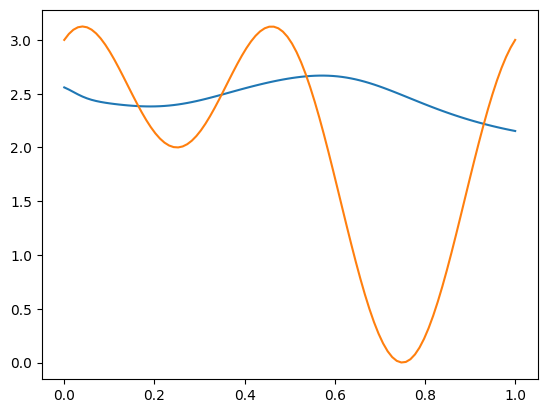

epoch: 5250, loss: 1.0518287420272827, learning_rate: 0.01
epoch: 5500, loss: 0.647657573223114, learning_rate: 0.01
epoch: 5750, loss: 0.6564041972160339, learning_rate: 0.01
epoch: 6000, loss: 0.6356077194213867, learning_rate: 0.01


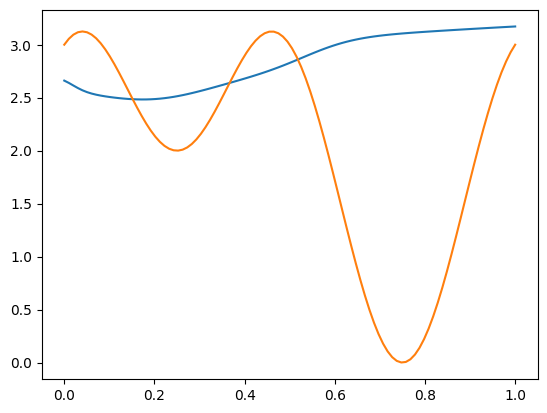

epoch: 6250, loss: 0.6887027025222778, learning_rate: 0.01
epoch: 6500, loss: 0.6368947625160217, learning_rate: 0.01
epoch: 6750, loss: 0.6265735626220703, learning_rate: 0.01
epoch: 7000, loss: 0.6215762495994568, learning_rate: 0.01


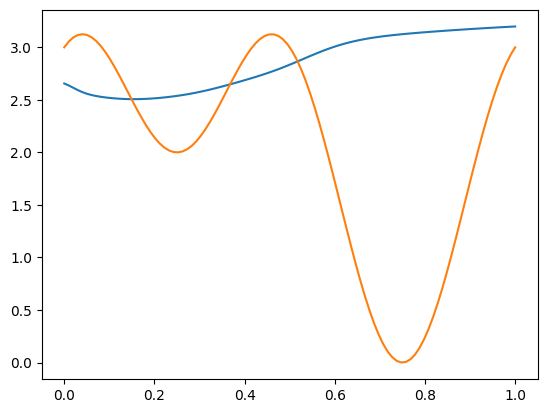

epoch: 7250, loss: 0.660473108291626, learning_rate: 0.01
epoch: 7500, loss: 0.6231314539909363, learning_rate: 0.01
epoch: 7750, loss: 0.6244615316390991, learning_rate: 0.01
epoch: 8000, loss: 0.6248540878295898, learning_rate: 0.01


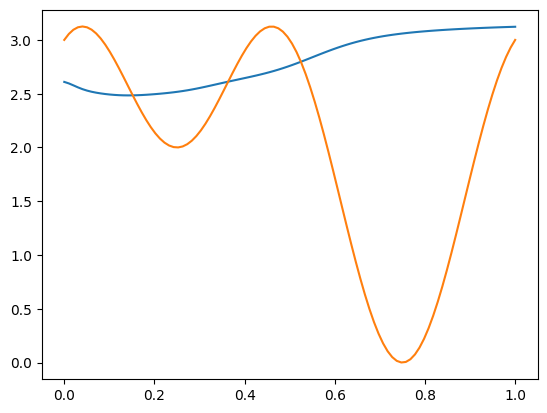

epoch: 8250, loss: 0.6256938576698303, learning_rate: 0.01
epoch: 8500, loss: 0.5938739776611328, learning_rate: 0.01
epoch: 8750, loss: 0.6206706166267395, learning_rate: 0.01
epoch: 9000, loss: 0.6484601497650146, learning_rate: 0.01


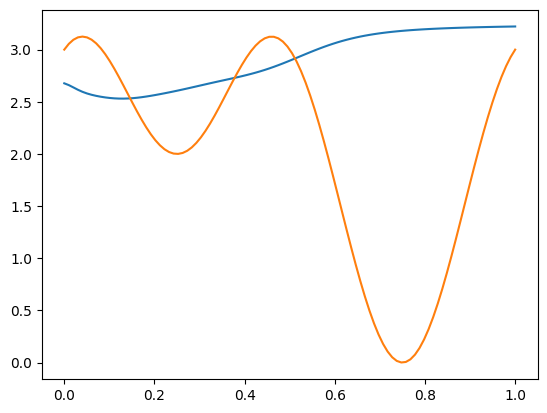

epoch: 9250, loss: 0.5893067717552185, learning_rate: 0.01
epoch: 9500, loss: 0.5808878540992737, learning_rate: 0.01
epoch: 9750, loss: 0.6256960034370422, learning_rate: 0.01
epoch: 10000, loss: 0.5706678032875061, learning_rate: 0.01


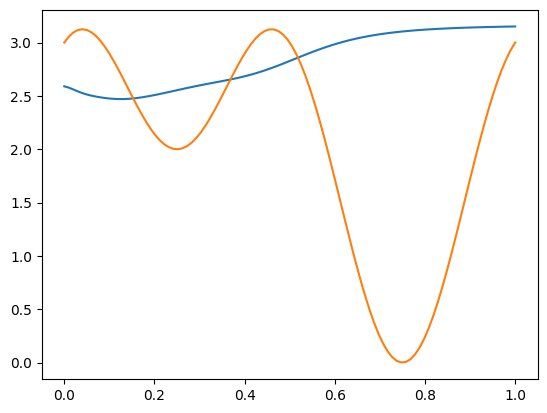

epoch: 10250, loss: 0.5687602758407593, learning_rate: 0.01
epoch: 10500, loss: 0.5618316531181335, learning_rate: 0.01
epoch: 10750, loss: 0.5601570010185242, learning_rate: 0.01
epoch: 11000, loss: 0.5634478330612183, learning_rate: 0.01


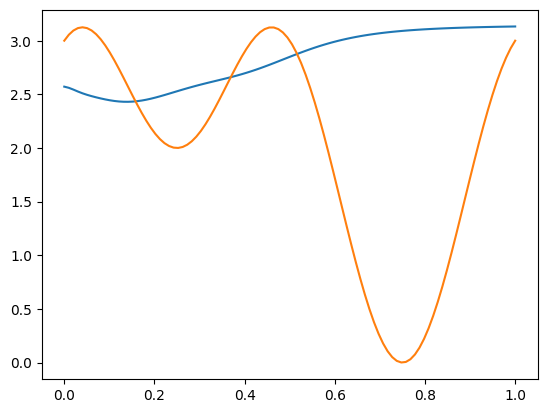

epoch: 11250, loss: 0.5858111381530762, learning_rate: 0.01
epoch: 11500, loss: 0.5729624629020691, learning_rate: 0.01
epoch: 11750, loss: 0.6139528155326843, learning_rate: 0.01
epoch: 12000, loss: 0.5336205959320068, learning_rate: 0.01


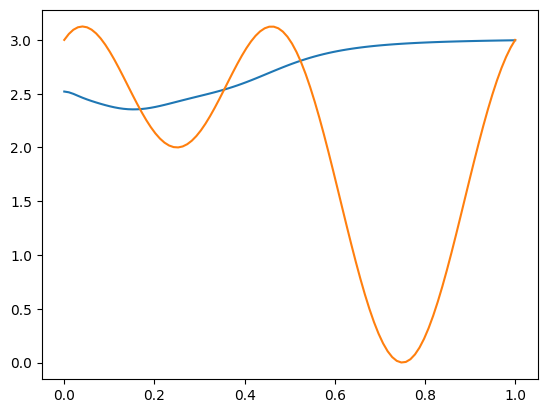

epoch: 12250, loss: 0.5345389246940613, learning_rate: 0.01
epoch: 12500, loss: 0.6051756143569946, learning_rate: 0.01
epoch: 12750, loss: 0.5416245460510254, learning_rate: 0.01
epoch: 13000, loss: 0.5371447801589966, learning_rate: 0.01


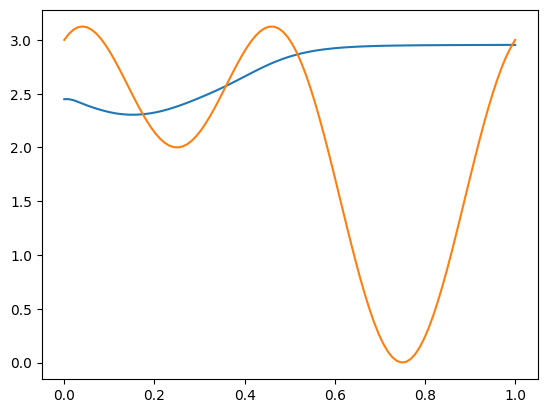

epoch: 13250, loss: 0.5073618292808533, learning_rate: 0.01
epoch: 13500, loss: 0.5318993330001831, learning_rate: 0.01
epoch: 13750, loss: 0.5450634956359863, learning_rate: 0.01
epoch: 14000, loss: 0.5600751638412476, learning_rate: 0.01


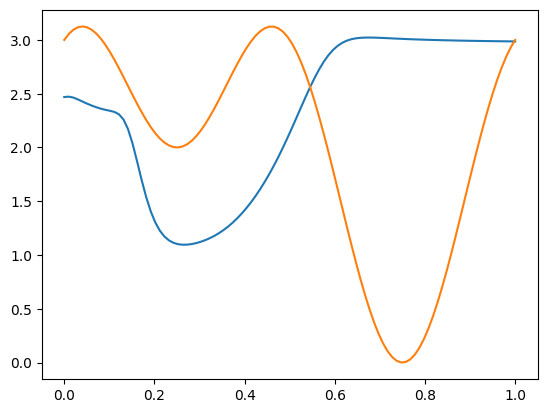

epoch: 14250, loss: 0.7368491291999817, learning_rate: 0.01
epoch: 14500, loss: 0.6001440286636353, learning_rate: 0.01
epoch: 14750, loss: 0.4904370605945587, learning_rate: 0.01
epoch: 15000, loss: 0.5588684678077698, learning_rate: 0.01


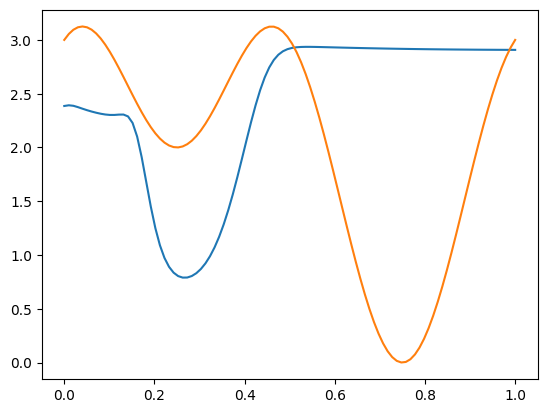

epoch: 15250, loss: 0.6336709260940552, learning_rate: 0.01
epoch: 15500, loss: 0.48380377888679504, learning_rate: 0.01
epoch: 15750, loss: 0.4725992977619171, learning_rate: 0.01
epoch: 16000, loss: 0.5637705326080322, learning_rate: 0.01


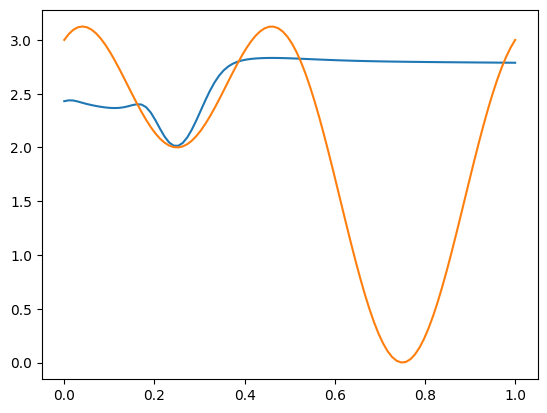

epoch: 16250, loss: 0.4838486611843109, learning_rate: 0.01
epoch: 16500, loss: 0.46829113364219666, learning_rate: 0.01
epoch: 16750, loss: 0.465900182723999, learning_rate: 0.01
epoch: 17000, loss: 0.47684964537620544, learning_rate: 0.01


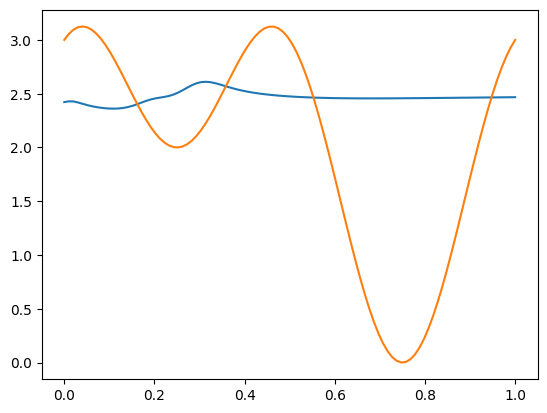

epoch: 17250, loss: 0.4724752604961395, learning_rate: 0.01
epoch: 17500, loss: 0.4707239866256714, learning_rate: 0.01
epoch: 17750, loss: 0.6585530042648315, learning_rate: 0.01
epoch: 18000, loss: 0.5058993101119995, learning_rate: 0.01


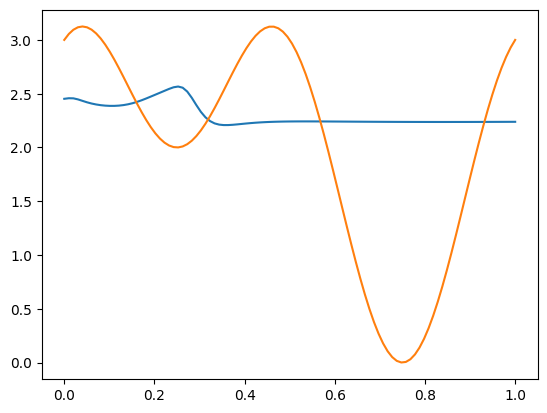

epoch: 18250, loss: 0.4431946277618408, learning_rate: 0.01
epoch: 18500, loss: 0.4627706706523895, learning_rate: 0.01
epoch: 18750, loss: 0.4441927671432495, learning_rate: 0.01
epoch: 19000, loss: 0.435802698135376, learning_rate: 0.01


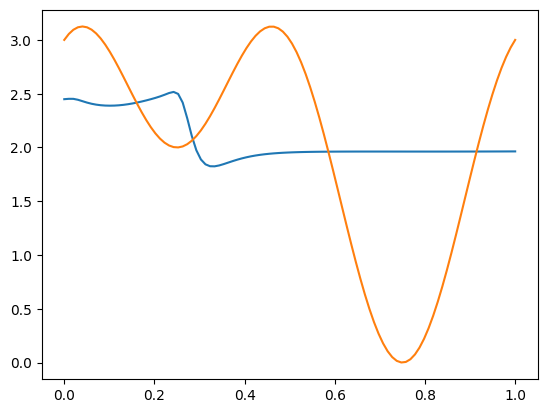

epoch: 19250, loss: 0.43612366914749146, learning_rate: 0.01
epoch: 19500, loss: 0.45190542936325073, learning_rate: 0.01
epoch: 19750, loss: 0.4893147945404053, learning_rate: 0.01
epoch: 20000, loss: 0.4649181365966797, learning_rate: 0.01


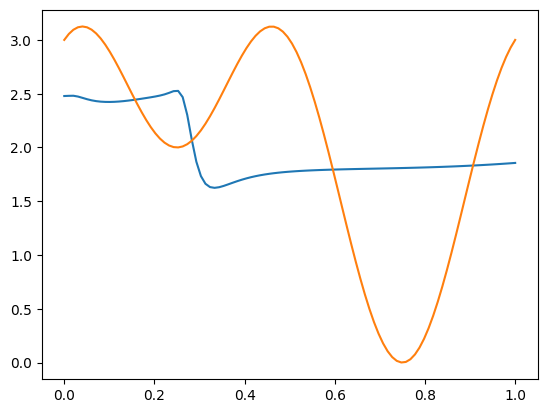

epoch: 20250, loss: 0.42798030376434326, learning_rate: 0.01
epoch: 20500, loss: 0.4463232457637787, learning_rate: 0.01
epoch: 20750, loss: 0.44123372435569763, learning_rate: 0.01
epoch: 21000, loss: 0.4355735182762146, learning_rate: 0.01


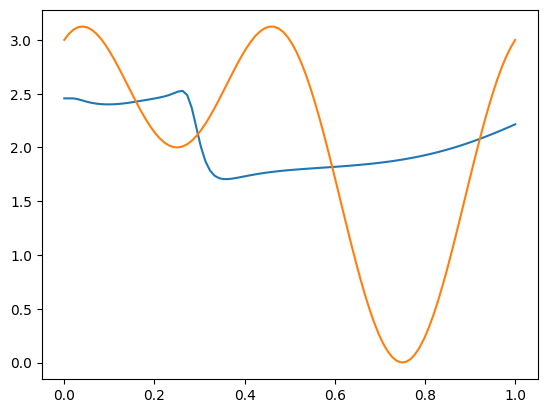

epoch: 21000, loss: 0.4355735182762146, learning_rate: 0.01


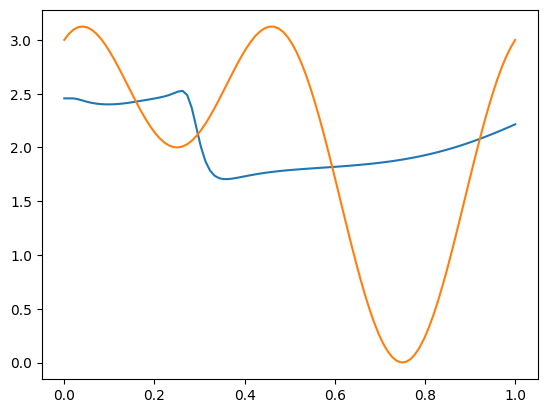

In [41]:
epochs = 21001

# loss_values = [0] * 210
# prev_epoch = 0

for cur_epoch in range(epochs):
    optimizer.zero_grad()
    
    boundary_condition_temp = pinn_model(boundary_condition_points)
    
    # compute the "data loss"
    loss1 = torch.mean((thermal_conductivity_equation(time_physics, x_physics) - boundary_condition_temp)**2)
    loss2 = torch.mean((thermal_conductivity_equation(torch.zeros_like(x_physics), x_physics) - boundary_condition_temp)**2)
    
    network_temp = pinn_model(points_for_pinn_model)
    
    dt = torch.autograd.grad(network_temp, time_physics, torch.ones_like(network_temp), create_graph=True)[0]

    # computes dy/dx
    dx = torch.autograd.grad(network_temp, x_physics, torch.ones_like(network_temp), create_graph=True)[0]
    
    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]
    
    # compute the "physics loss"
    loss3 = torch.mean((dt - dx2)**2)
    
    
    loss = loss1 + loss2 + loss3
    loss.backward(retain_graph=True)
    
    optimizer.step()
#     scheduler.step(loss)
#     optimizer.param_groups[0]['lr'] = max(0.0001, optimizer.param_groups[0]['lr'])
    

    """
    attempts to create our own scheduler
    """
#     if loss < 0.45:
#         if cur_epoch % 100 == 0:
#             loss_values[prev_epoch] = loss
            
#             if prev_epoch > 0 and abs(loss_values[prev_epoch] - loss_values[prev_epoch - 1]) < 0.01:
#                 optimizer.param_groups[0]['lr'] = 0.005
            
#             prev_epoch += 1
        
    
#     if loss < 0.43 and steps < 7:
#         optimizer.param_groups[0]['lr'] -= 0.001
#         steps += 1
#         print(f"the {steps} step has been taken")
#     if loss < 0.4:
#         opinion = input("input y or n")
#         while opinion not in ["y", "n"]:
#             print("Try again:")
#             opinion = input("input y or n")
#         if opinion == "y":
#             break
            
    
    if cur_epoch % 250 == 0:
        print(f'epoch: {cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
    if cur_epoch % 1000 == 0:
        check_current_situation(pinn_model)
#         clock.sleep(0.25)
        
    
print(f'epoch: {cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
check_current_situation(pinn_model)    
    

epoch: 21000, loss: 0.4371095299720764, learning_rate: 0.01


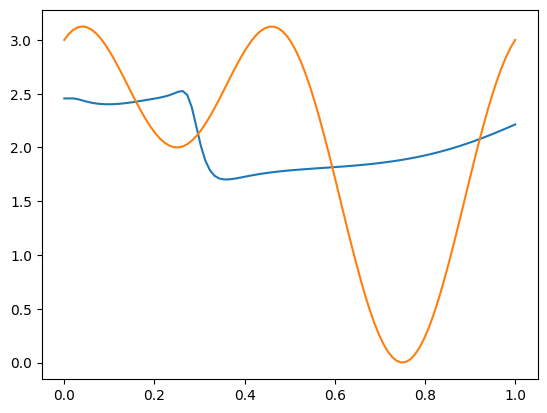

epoch: 21250, loss: 0.5728886127471924, learning_rate: 0.01
epoch: 21500, loss: 0.4237084686756134, learning_rate: 0.01
epoch: 21750, loss: 0.4350709021091461, learning_rate: 0.01
epoch: 22000, loss: 0.43945884704589844, learning_rate: 0.01


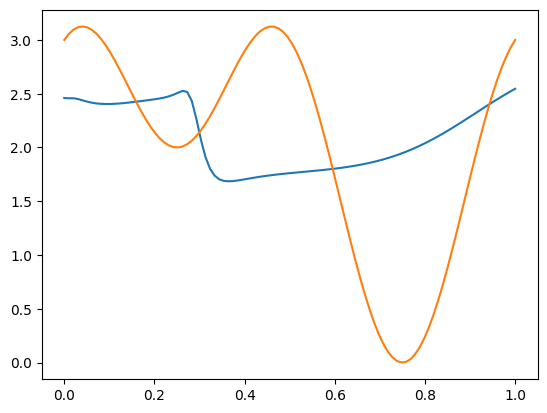

epoch: 22250, loss: 0.42326486110687256, learning_rate: 0.01
epoch: 22500, loss: 0.49102872610092163, learning_rate: 0.01
epoch: 22750, loss: 0.41719114780426025, learning_rate: 0.01
epoch: 23000, loss: 0.4265291094779968, learning_rate: 0.01


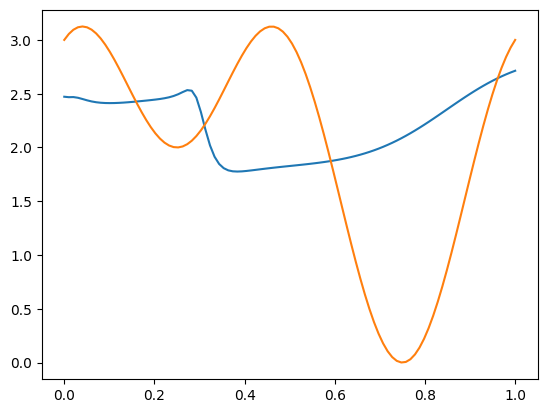

epoch: 23250, loss: 0.4201981723308563, learning_rate: 0.01
epoch: 23500, loss: 0.42263901233673096, learning_rate: 0.01
epoch: 23750, loss: 0.42794084548950195, learning_rate: 0.01
epoch: 24000, loss: 0.4103183448314667, learning_rate: 0.01


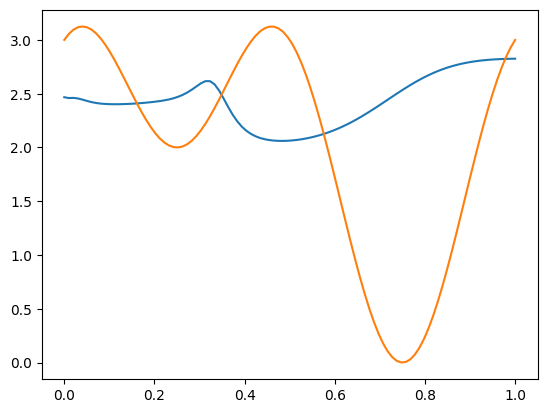

epoch: 24250, loss: 0.4839494824409485, learning_rate: 0.01
epoch: 24500, loss: 0.4151637554168701, learning_rate: 0.01
epoch: 24750, loss: 0.41489118337631226, learning_rate: 0.01
epoch: 25000, loss: 0.4817303717136383, learning_rate: 0.01


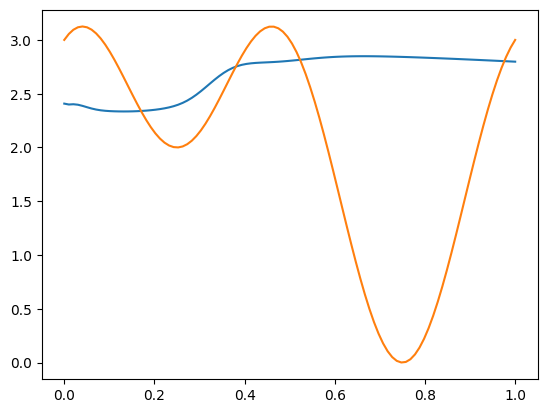

epoch: 25250, loss: 0.4021230638027191, learning_rate: 0.01
epoch: 25500, loss: 0.426849365234375, learning_rate: 0.01
epoch: 25750, loss: 0.5617088675498962, learning_rate: 0.01
epoch: 26000, loss: 0.4244745373725891, learning_rate: 0.01


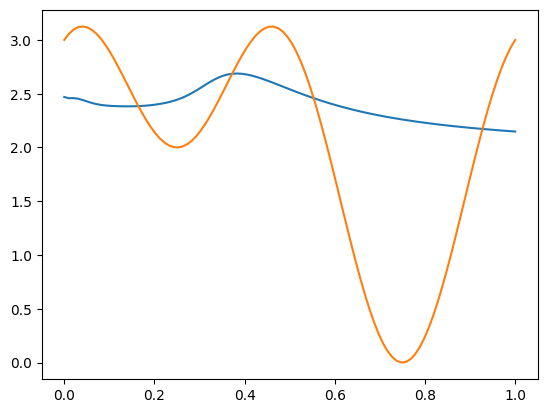

epoch: 26250, loss: 1.4923570156097412, learning_rate: 0.01
epoch: 26500, loss: 0.4145576059818268, learning_rate: 0.01
epoch: 26750, loss: 0.42092859745025635, learning_rate: 0.01
epoch: 27000, loss: 0.4091160297393799, learning_rate: 0.01


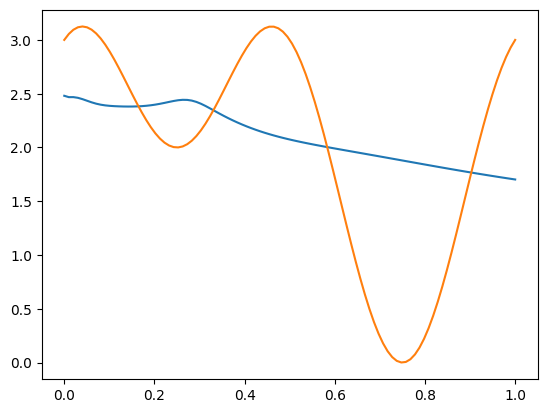

epoch: 27250, loss: 0.4431019723415375, learning_rate: 0.01
epoch: 27500, loss: 0.3991512954235077, learning_rate: 0.01
epoch: 27750, loss: 0.3958785831928253, learning_rate: 0.01
epoch: 28000, loss: 0.5943870544433594, learning_rate: 0.01


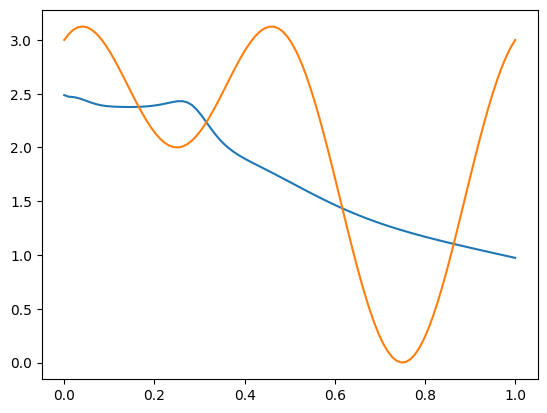

epoch: 28250, loss: 0.40171298384666443, learning_rate: 0.01
epoch: 28500, loss: 0.4212992489337921, learning_rate: 0.01
epoch: 28750, loss: 0.40103310346603394, learning_rate: 0.01
epoch: 29000, loss: 0.4618748426437378, learning_rate: 0.01


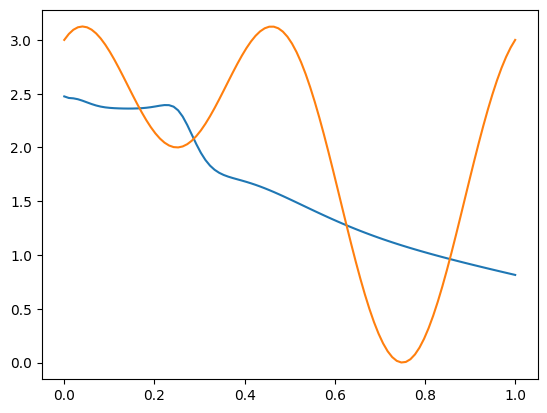

epoch: 29250, loss: 0.39794790744781494, learning_rate: 0.01
epoch: 29500, loss: 0.4024032652378082, learning_rate: 0.01
epoch: 29750, loss: 0.3871121406555176, learning_rate: 0.01
epoch: 30000, loss: 0.3951079547405243, learning_rate: 0.01


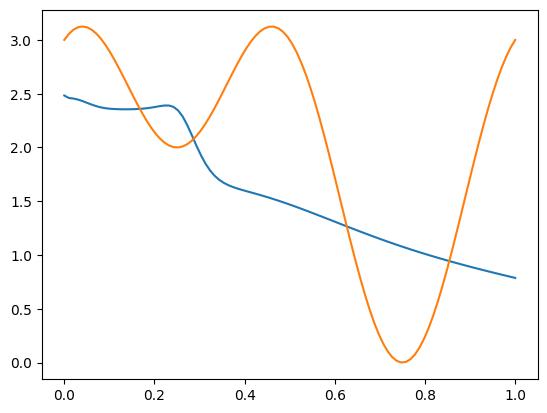

epoch: 30250, loss: 0.4182061553001404, learning_rate: 0.01
epoch: 30500, loss: 0.4752412438392639, learning_rate: 0.01
epoch: 30750, loss: 0.39552295207977295, learning_rate: 0.01
epoch: 30999, loss: 0.42512747645378113, learning_rate: 0.01


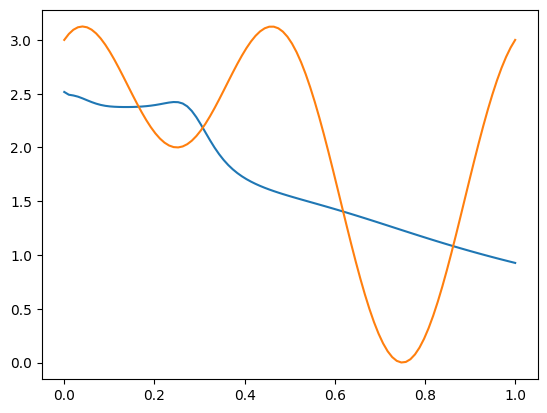

In [42]:
epochs = 10000


for cur_epoch in range(epochs):
    optimizer.zero_grad()
    
    boundary_condition_temp = pinn_model(boundary_condition_points)
    
    # compute the "data loss"
    loss1 = torch.mean((thermal_conductivity_equation(time_physics, x_physics) - boundary_condition_temp)**2)
    loss2 = torch.mean((thermal_conductivity_equation(torch.zeros_like(x_physics), x_physics) - boundary_condition_temp)**2)
    
    network_temp = pinn_model(points_for_pinn_model)
    
    dt = torch.autograd.grad(network_temp, time_physics, torch.ones_like(network_temp), create_graph=True)[0]

    # computes dy/dx
    dx = torch.autograd.grad(network_temp, x_physics, torch.ones_like(network_temp), create_graph=True)[0]
    
    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]
    
    # compute the "physics loss"
    loss3 = torch.mean((dt - dx2)**2)
    
    
    loss = loss1 + loss2 + loss3
    loss.backward(retain_graph=True)
    
    optimizer.step()
            
    
    if cur_epoch % 250 == 0:
        print(f'epoch: {21000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
    if cur_epoch % 1000 == 0:
        check_current_situation(pinn_model)
#         clock.sleep(0.25)
        
    
print(f'epoch: {21000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
check_current_situation(pinn_model)    
    

epoch: 31000, loss: 0.4468802511692047, learning_rate: 0.01


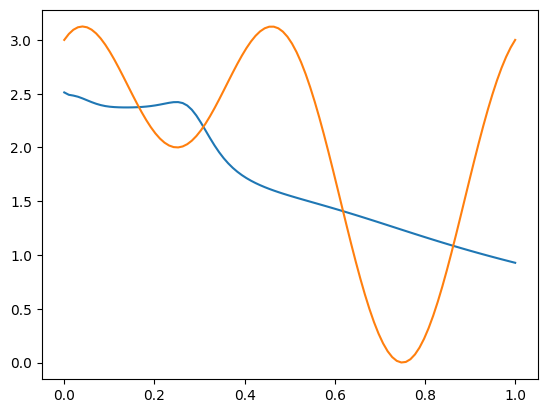

epoch: 31250, loss: 0.4420376420021057, learning_rate: 0.01
epoch: 31500, loss: 0.4095950722694397, learning_rate: 0.01
epoch: 31750, loss: 0.3765023946762085, learning_rate: 0.01
epoch: 32000, loss: 0.38241320848464966, learning_rate: 0.01


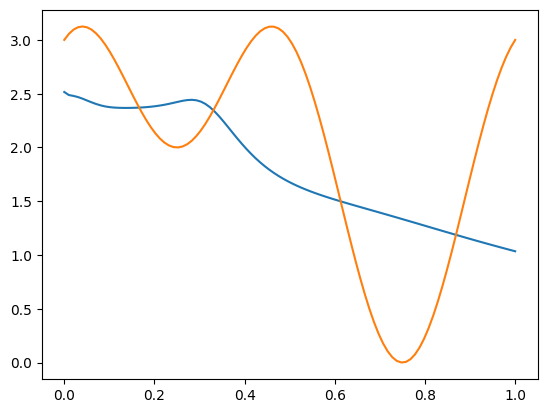

epoch: 32250, loss: 0.3907178044319153, learning_rate: 0.01
epoch: 32500, loss: 0.3861805498600006, learning_rate: 0.01
epoch: 32750, loss: 0.3954584300518036, learning_rate: 0.01
epoch: 33000, loss: 0.39082208275794983, learning_rate: 0.01


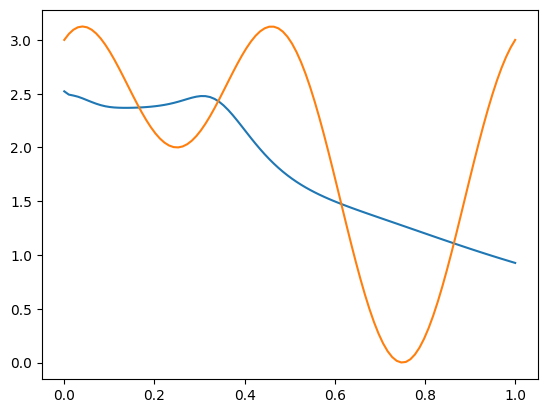

epoch: 33250, loss: 0.4097808301448822, learning_rate: 0.01
epoch: 33500, loss: 0.39072108268737793, learning_rate: 0.01
epoch: 33750, loss: 0.37972041964530945, learning_rate: 0.01
epoch: 34000, loss: 0.39537426829338074, learning_rate: 0.01


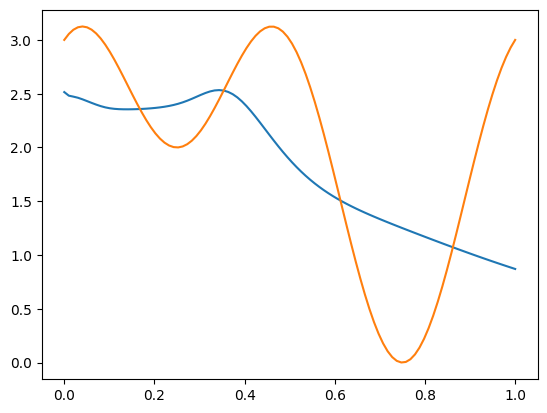

epoch: 34250, loss: 0.569657564163208, learning_rate: 0.01
epoch: 34500, loss: 0.3926886320114136, learning_rate: 0.01
epoch: 34750, loss: 0.3974606990814209, learning_rate: 0.01
epoch: 35000, loss: 0.3912021815776825, learning_rate: 0.01


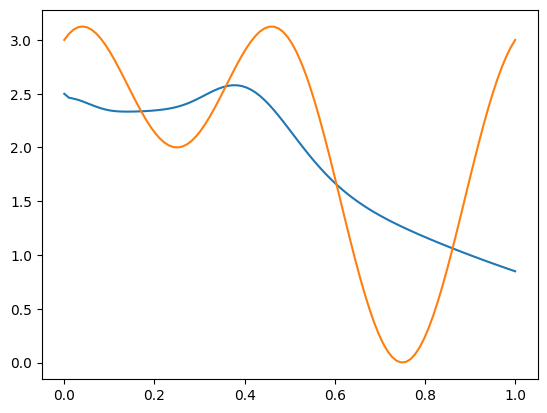

epoch: 35250, loss: 0.5320801138877869, learning_rate: 0.01
epoch: 35500, loss: 0.41880086064338684, learning_rate: 0.01
epoch: 35750, loss: 0.40845364332199097, learning_rate: 0.01
epoch: 36000, loss: 0.3704676330089569, learning_rate: 0.01


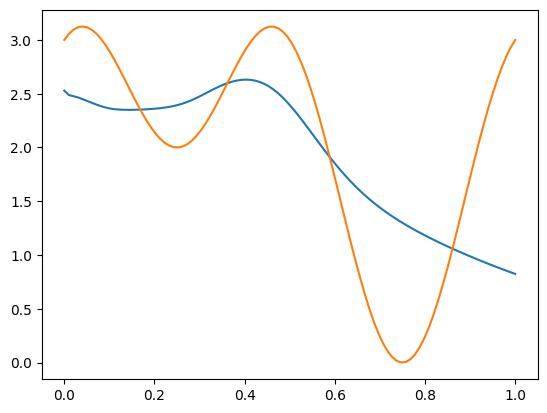

epoch: 36250, loss: 0.37833189964294434, learning_rate: 0.01
epoch: 36500, loss: 0.47320517897605896, learning_rate: 0.01
epoch: 36750, loss: 0.3730013966560364, learning_rate: 0.01
epoch: 37000, loss: 0.4033953845500946, learning_rate: 0.01


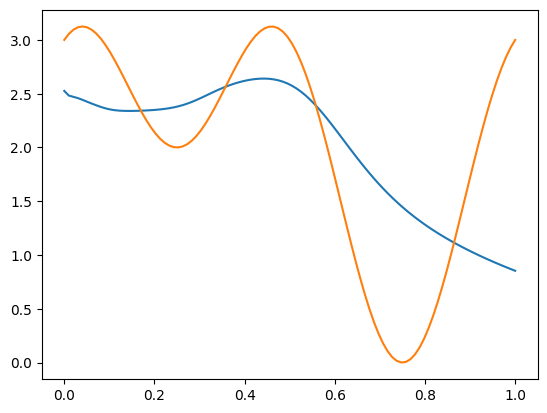

epoch: 37250, loss: 0.3702412545681, learning_rate: 0.01
epoch: 37500, loss: 0.3741730749607086, learning_rate: 0.01
epoch: 37750, loss: 0.428649365901947, learning_rate: 0.01
epoch: 38000, loss: 0.41069701313972473, learning_rate: 0.01


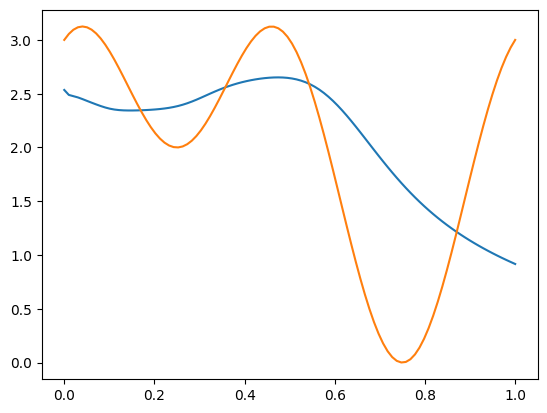

epoch: 38250, loss: 0.3857884109020233, learning_rate: 0.01
epoch: 38500, loss: 0.3627450466156006, learning_rate: 0.01
epoch: 38750, loss: 0.3824276030063629, learning_rate: 0.01
epoch: 39000, loss: 0.37900876998901367, learning_rate: 0.01


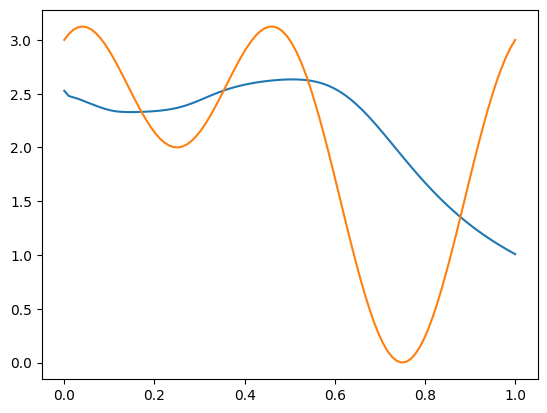

epoch: 39250, loss: 0.4370746314525604, learning_rate: 0.01
epoch: 39500, loss: 0.374016135931015, learning_rate: 0.01
epoch: 39750, loss: 0.4024006724357605, learning_rate: 0.01
epoch: 40000, loss: 0.3998761475086212, learning_rate: 0.01


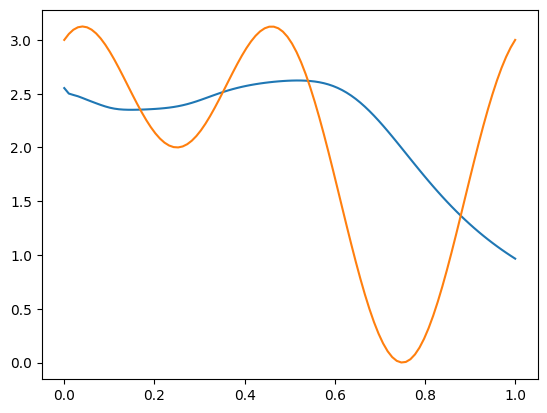

epoch: 40250, loss: 0.4570622742176056, learning_rate: 0.01
epoch: 40500, loss: 0.36329489946365356, learning_rate: 0.01
epoch: 40750, loss: 0.3840636610984802, learning_rate: 0.01
epoch: 41000, loss: 0.36800873279571533, learning_rate: 0.01


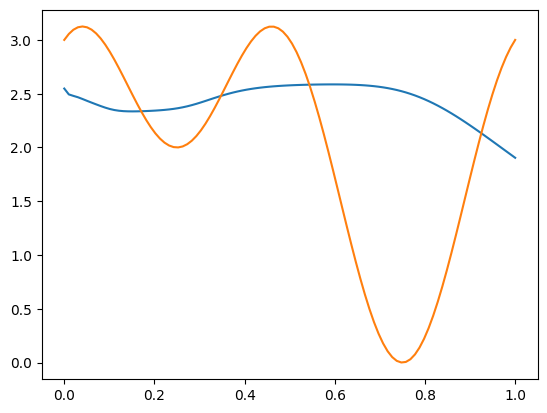

epoch: 41250, loss: 0.35943204164505005, learning_rate: 0.01
epoch: 41500, loss: 0.37359827756881714, learning_rate: 0.01
epoch: 41750, loss: 0.3770419955253601, learning_rate: 0.01
epoch: 42000, loss: 0.3781035840511322, learning_rate: 0.01


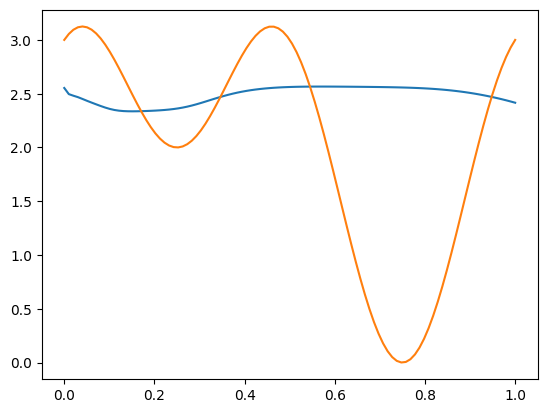

epoch: 42250, loss: 0.36625391244888306, learning_rate: 0.01
epoch: 42500, loss: 0.38233762979507446, learning_rate: 0.01
epoch: 42750, loss: 0.3658478856086731, learning_rate: 0.01
epoch: 43000, loss: 0.4011760354042053, learning_rate: 0.01


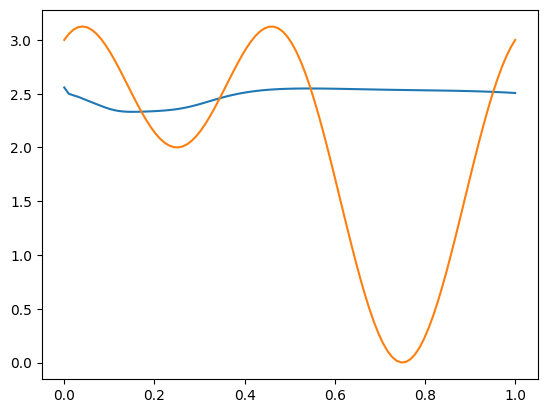

epoch: 43250, loss: 0.36872199177742004, learning_rate: 0.01
epoch: 43500, loss: 0.3659599721431732, learning_rate: 0.01
epoch: 43750, loss: 0.40046191215515137, learning_rate: 0.01
epoch: 44000, loss: 0.3758969008922577, learning_rate: 0.01


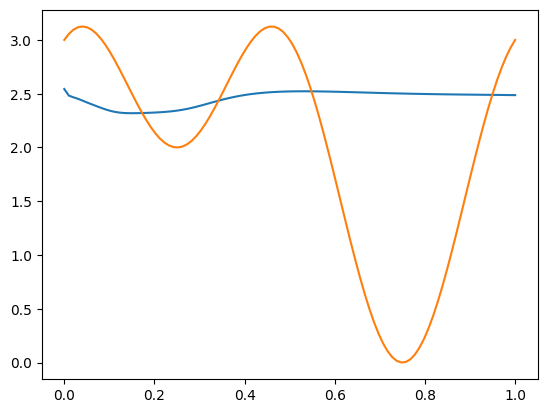

epoch: 44250, loss: 0.3915269672870636, learning_rate: 0.01
epoch: 44500, loss: 0.3625074625015259, learning_rate: 0.01
epoch: 44750, loss: 0.37083542346954346, learning_rate: 0.01
epoch: 45000, loss: 0.37184759974479675, learning_rate: 0.01


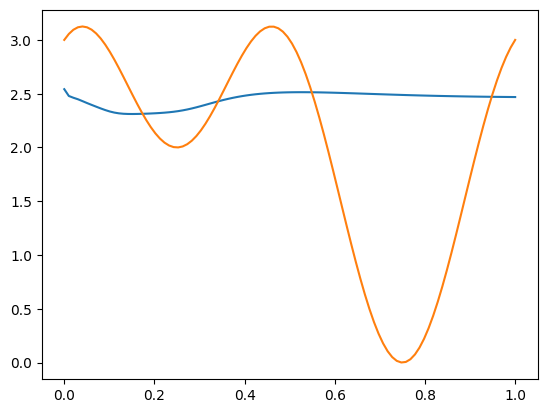

epoch: 45250, loss: 0.35987794399261475, learning_rate: 0.01
epoch: 45500, loss: 0.4672344923019409, learning_rate: 0.01
epoch: 45750, loss: 0.371635764837265, learning_rate: 0.01
epoch: 46000, loss: 0.38295885920524597, learning_rate: 0.01


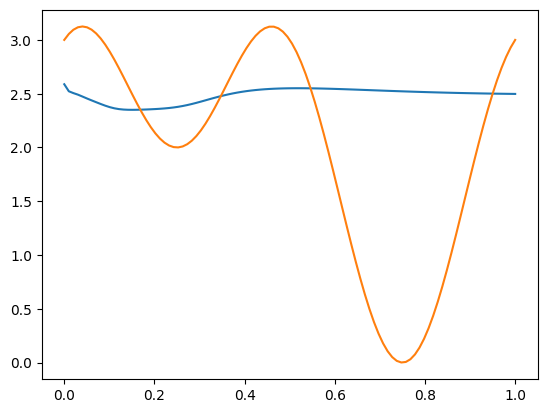

epoch: 46250, loss: 0.4399614632129669, learning_rate: 0.01
epoch: 46500, loss: 0.36986467242240906, learning_rate: 0.01
epoch: 46750, loss: 0.39793428778648376, learning_rate: 0.01
epoch: 47000, loss: 0.39571231603622437, learning_rate: 0.01


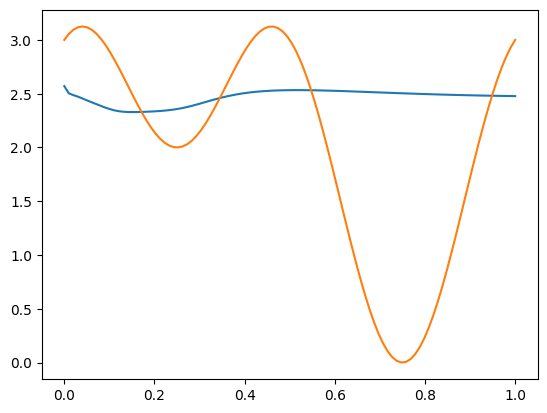

epoch: 47250, loss: 0.4727298617362976, learning_rate: 0.01
epoch: 47500, loss: 0.37666815519332886, learning_rate: 0.01
epoch: 47750, loss: 0.39629340171813965, learning_rate: 0.01
epoch: 48000, loss: 0.4679238796234131, learning_rate: 0.01


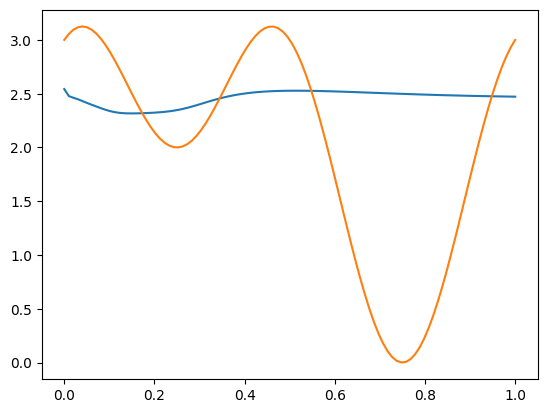

epoch: 48250, loss: 0.3639402389526367, learning_rate: 0.01
epoch: 48500, loss: 0.380376935005188, learning_rate: 0.01
epoch: 48750, loss: 0.37802812457084656, learning_rate: 0.01
epoch: 49000, loss: 0.3655534088611603, learning_rate: 0.01


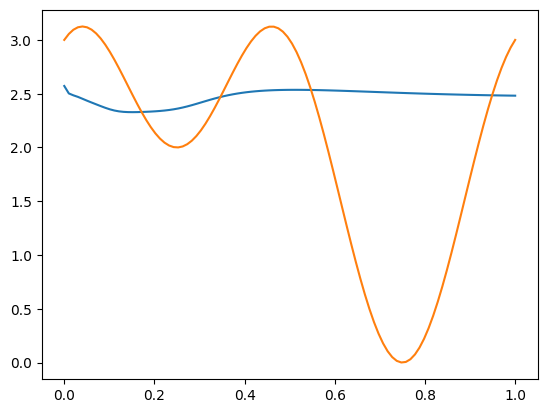

epoch: 49250, loss: 0.3590044677257538, learning_rate: 0.01
epoch: 49500, loss: 0.3554139733314514, learning_rate: 0.01
epoch: 49750, loss: 0.4217337369918823, learning_rate: 0.01
epoch: 50000, loss: 0.3797197639942169, learning_rate: 0.01


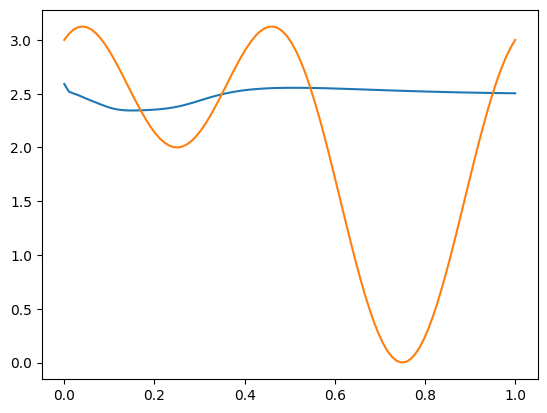

epoch: 50250, loss: 0.44256311655044556, learning_rate: 0.01
epoch: 50500, loss: 0.3761102855205536, learning_rate: 0.01
epoch: 50750, loss: 0.37012457847595215, learning_rate: 0.01
epoch: 50999, loss: 0.35257598757743835, learning_rate: 0.01


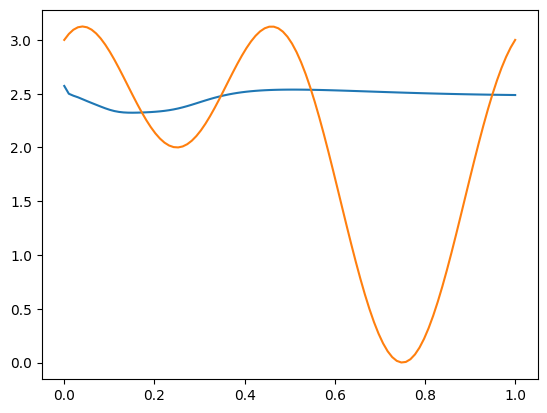

In [43]:
# предыдущий график очень хороший, после него получился тот, который отдельным файлом загружен
epochs = 20000


for cur_epoch in range(epochs):
    optimizer.zero_grad()
    
    boundary_condition_temp = pinn_model(boundary_condition_points)
    
    # compute the "data loss"
    loss1 = torch.mean((thermal_conductivity_equation(time_physics, x_physics) - boundary_condition_temp)**2)
    loss2 = torch.mean((thermal_conductivity_equation(torch.zeros_like(x_physics), x_physics) - boundary_condition_temp)**2)
    
    network_temp = pinn_model(points_for_pinn_model)
    
    dt = torch.autograd.grad(network_temp, time_physics, torch.ones_like(network_temp), create_graph=True)[0]

    # computes dy/dx
    dx = torch.autograd.grad(network_temp, x_physics, torch.ones_like(network_temp), create_graph=True)[0]
    
    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]
    
    # compute the "physics loss"
    loss3 = torch.mean((dt - dx2)**2)
    
    
    loss = loss1 + loss2 + loss3
    loss.backward(retain_graph=True)
    
    optimizer.step()
            
    
    if cur_epoch % 250 == 0:
        print(f'epoch: {31000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
    if cur_epoch % 1000 == 0:
        check_current_situation(pinn_model)
#         clock.sleep(0.25)
        
    
print(f'epoch: {31000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
check_current_situation(pinn_model)    
    

epoch: 51000, loss: 0.3512159585952759, learning_rate: 0.01


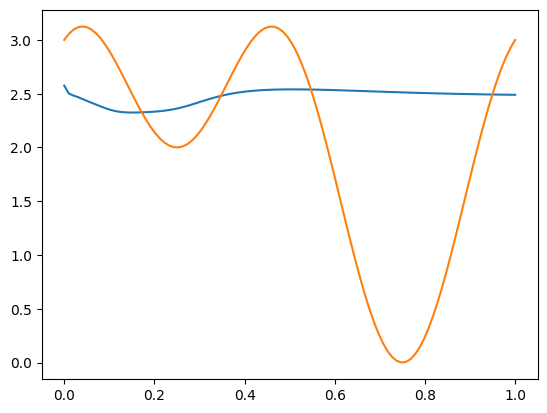

epoch: 51250, loss: 0.36190229654312134, learning_rate: 0.01
epoch: 51500, loss: 0.37387722730636597, learning_rate: 0.01
epoch: 51750, loss: 0.4635498523712158, learning_rate: 0.01
epoch: 52000, loss: 0.3776335120201111, learning_rate: 0.01


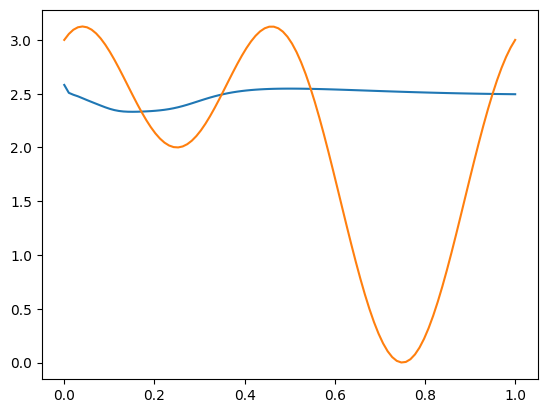

epoch: 52250, loss: 0.39932429790496826, learning_rate: 0.01
epoch: 52500, loss: 0.3584211468696594, learning_rate: 0.01
epoch: 52750, loss: 0.3732192814350128, learning_rate: 0.01
epoch: 53000, loss: 0.3699859380722046, learning_rate: 0.01


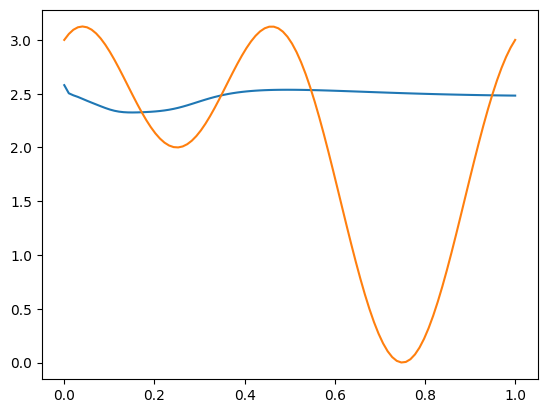

epoch: 53250, loss: 0.42200449109077454, learning_rate: 0.01
epoch: 53500, loss: 0.38579079508781433, learning_rate: 0.01
epoch: 53750, loss: 0.35660484433174133, learning_rate: 0.01
epoch: 54000, loss: 0.35379523038864136, learning_rate: 0.01


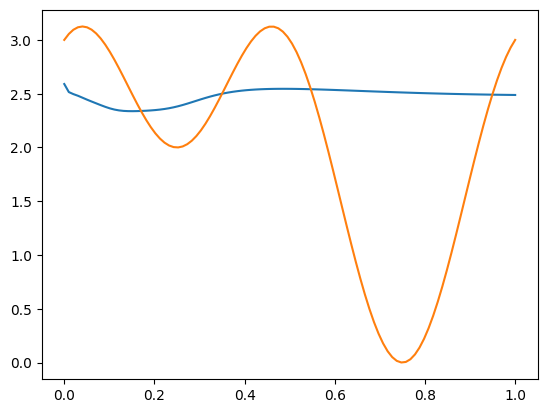

epoch: 54250, loss: 0.36677536368370056, learning_rate: 0.01
epoch: 54500, loss: 0.3706190288066864, learning_rate: 0.01
epoch: 54750, loss: 0.3704991042613983, learning_rate: 0.01
epoch: 55000, loss: 0.3847135901451111, learning_rate: 0.01


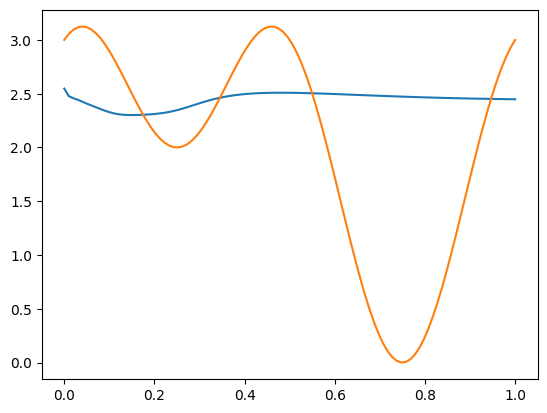

epoch: 55250, loss: 0.3633539080619812, learning_rate: 0.01
epoch: 55500, loss: 0.36432141065597534, learning_rate: 0.01
epoch: 55750, loss: 0.3913336992263794, learning_rate: 0.01
epoch: 56000, loss: 0.35478436946868896, learning_rate: 0.01


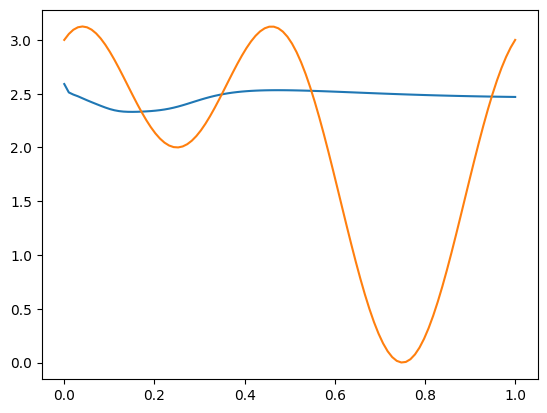

epoch: 56250, loss: 0.35673704743385315, learning_rate: 0.01
epoch: 56500, loss: 0.36478784680366516, learning_rate: 0.01
epoch: 56750, loss: 0.3646746277809143, learning_rate: 0.01
epoch: 57000, loss: 0.3580797612667084, learning_rate: 0.01


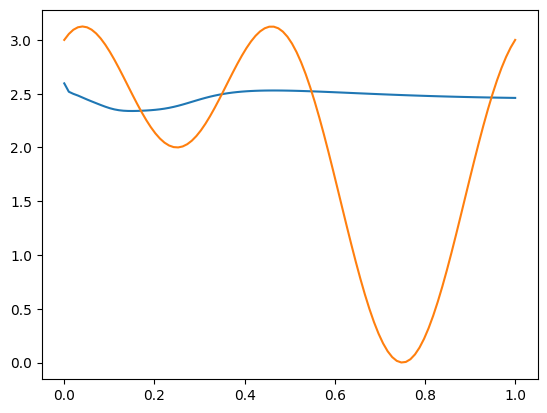

epoch: 57250, loss: 0.37806543707847595, learning_rate: 0.01
epoch: 57500, loss: 0.5139259099960327, learning_rate: 0.01
epoch: 57750, loss: 0.35446715354919434, learning_rate: 0.01
epoch: 58000, loss: 0.3475286662578583, learning_rate: 0.01


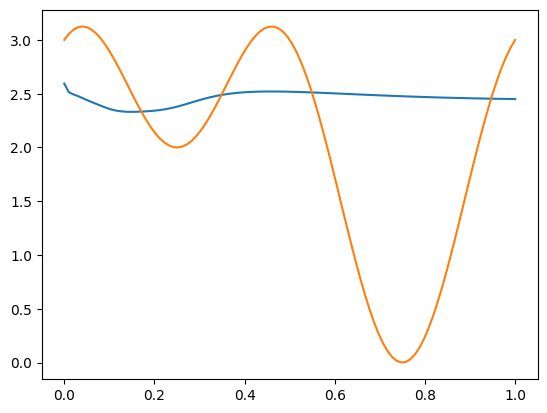

epoch: 58250, loss: 0.36892449855804443, learning_rate: 0.01
epoch: 58500, loss: 0.3525813817977905, learning_rate: 0.01
epoch: 58750, loss: 0.35977599024772644, learning_rate: 0.01


In [ ]:
epochs = 10000


for cur_epoch in range(epochs):
    optimizer.zero_grad()
    
    boundary_condition_temp = pinn_model(boundary_condition_points)
    
    # compute the "data loss"
    loss1 = torch.mean((thermal_conductivity_equation(time_physics, x_physics) - boundary_condition_temp)**2)
    loss2 = torch.mean((thermal_conductivity_equation(torch.zeros_like(x_physics), x_physics) - boundary_condition_temp)**2)
    
    network_temp = pinn_model(points_for_pinn_model)
    
    dt = torch.autograd.grad(network_temp, time_physics, torch.ones_like(network_temp), create_graph=True)[0]

    # computes dy/dx
    dx = torch.autograd.grad(network_temp, x_physics, torch.ones_like(network_temp), create_graph=True)[0]
    
    # computes d^2y/dx^2
    dx2 = torch.autograd.grad(dx,  x_physics, torch.ones_like(dx),  create_graph=True)[0]
    
    # compute the "physics loss"
    loss3 = torch.mean((dt - dx2)**2)
    
    
    loss = loss1 + loss2 + loss3
    loss.backward(retain_graph=True)
    
    optimizer.step()
    
    if cur_epoch % 250 == 0:
        print(f'epoch: {51000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
    if cur_epoch % 1000 == 0:
        check_current_situation(pinn_model)
#         clock.sleep(0.25)
        
    
print(f'epoch: {51000 + cur_epoch}, loss: {loss}, learning_rate: {optimizer.param_groups[0]["lr"]}')
check_current_situation(pinn_model)    
    